# Fault Detection with VAR Models

### Plot the dataset
##### I want to fix the model problem to predict the other attributes

In [12]:
# Importing packages and libraries
from pandas import read_csv
import pandas as pd
import numpy as np
import pickle
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [13]:
def plot_multiple_series(actual, pred, attr):
    
    for i in range(len(attr)):
        title = "Prediction of {}".format(attr[i])
        plt.title(title)
        plt.xlabel("Timestep")
        plt.ylabel("Values")
        plt.plot(actual.iloc[:,i], label="actual")
        plt.plot(pred.iloc[:,i], label="forecast")
        plt.legend()
        plt.show()
#     return



In [14]:
def root_mse(x, y):
    if len(x) != len(y):
        return "Error: The two arguments must have the same length"
    mse = np.square(np.subtract(x, y)).mean()
    return np.sqrt(mse)



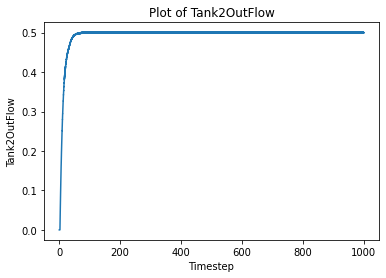

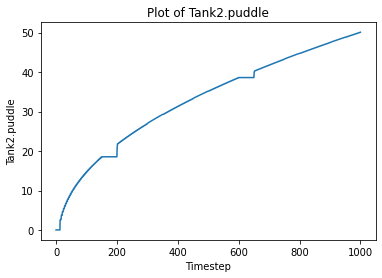

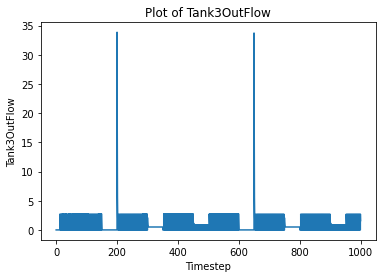

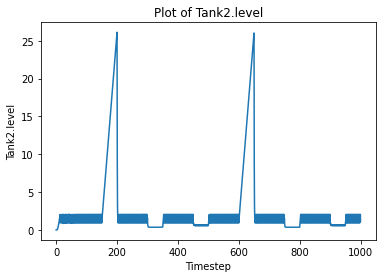

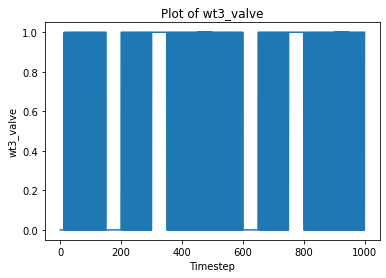

In [15]:
def plot_series(series, attr):
    for i in range(len(attr)):
        title = "Plot of "+str(attr[i])
        actual = series.iloc[:,i]
        plt.title(title)
        plt.xlabel("Timestep")
        plt.ylabel(attr[i])
        plt.plot(actual)
        plt.show()
        
file = 'test_series_reduced.csv'
df_raw = read_csv(file, header=0, index_col=0)
attr = list(pd.read_csv(file).columns.values)[1:]        
series = df_raw.iloc[:40000,:]
plot_series(series, attr)

### Normalisation of the golden dataset
##### This is to obtain the mean and standard deviation that would be used for normalising all the datasets

In [16]:
def normalise_timeseries(data):
    # Calculate the mean and standard deviation for each feature
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    
    # Normalise each feature using standard deviation
    normalised_data = (data - means) / stds
    return pd.DataFrame(normalised_data)



def denormalise_timeseries(data, means, stds):
    denormalised_data = (data * stds) + means
    return pd.DataFrame(denormalised_data)



normalised_data = normalise_timeseries(df_raw)

In [17]:
testData = normalised_data
testData

,Tank2OutFlow,Tank2.puddle,Tank3OutFlow,Tank2.level,wt3_valve
time,,,,,
0.00,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
0.05,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
0.10,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
0.15,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
0.20,-11.718138,-2.630905,-0.399607,-0.564448,-0.699801
...,...,...,...,...,...
999.80,0.126510,1.389939,1.245761,-0.249446,1.428978
999.85,0.133595,1.390251,1.179017,-0.262224,1.428978
999.90,0.169767,1.390697,1.085672,-0.280094,1.428978


In [18]:
# Train Test Split
nobs = 3000
# train = df[:-nobs]
train = testData.iloc[:-nobs]
test = testData.iloc[-nobs:]
len(train), len(test)

(17001, 3000)

### Load the saved models

In [19]:
# The saved models are loaded to reconstruct the VAR
attr = list(pd.read_csv('waterTank_Golden_reduced.csv').columns.values)[1:]
with open('var_golden_model_reduced.pkl', 'rb') as f:
    golden_model = pickle.load(f)

with open('var_ctrl_valueFlip_perm_reduced.pkl', 'rb') as vf:
    valueFlip_model = pickle.load(vf)    

with open('var_ctrl_stuckat0_perm_reduced.pkl', 'rb') as stuck0:
    stuckat0_model = pickle.load(stuck0)    

with open('var_ctrl_stuckat1_perm_reduced.pkl', 'rb') as stuck1:
    stuckat1_model = pickle.load(stuck1)



In [20]:

# golden_model = VAR.load('var_golden_model.pkl')

# Retrieve the lag order
lag_order = golden_model.k_ar
# lag_order = 19

# Prepare new data
# newData = pd.read_csv('waterTank_Golden.csv', index_col=0, header=0, parse_dates=True)
# newData = newData[attr]
# newData = newData[-lag_order:]
# newData = newData[:200,:]

# Initialise the VAR model
model_input = train.values
# model_input = newData.values
# golden_model.initialize_known(model_input)

# Make predictions
predictions = golden_model.forecast(model_input, steps=5)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=train.columns)

print(predictions_df)


   Tank2OutFlow  Tank2.puddle  Tank3OutFlow  Tank2.level  wt3_valve
0      0.130040      1.071437      1.445311    -0.457846   0.710953
1      0.153117      1.072480      0.461713    -0.395210   0.498848
2      0.182873      1.074585      0.131807    -0.515252  -0.007315
3      0.182299      1.075647     -0.497985    -0.373315  -0.099656
4      0.161267      1.077503     -0.585622    -0.366273  -0.453659


In [21]:
test

,Tank2OutFlow,Tank2.puddle,Tank3OutFlow,Tank2.level,wt3_valve
time,,,,,
850.05,0.126510,1.069279,1.783620,-0.146474,1.428978
850.10,0.144185,1.069946,1.641499,-0.173682,1.428978
850.15,0.169767,1.070366,1.553208,-0.190586,1.428978
850.20,0.168293,1.070963,1.429786,-0.214214,1.428978
850.25,0.143823,1.071340,1.353086,-0.228899,1.428978
...,...,...,...,...,...
999.80,0.126510,1.389939,1.245761,-0.249446,1.428978
999.85,0.133595,1.390251,1.179017,-0.262224,1.428978
999.90,0.169767,1.390697,1.085672,-0.280094,1.428978


### Plot the input signals

In [22]:
def plot_multiple_series(actual, pred, attr):
    if len(actual) != len(pred):
        return "Error: The lengths of the two data must be the same!"
    x = range(len(pred))
    for i in range(len(attr)):
        title = "Prediction of {}".format(attr[i])
        plt.title(title)
        plt.xlabel("Timestep")
        plt.ylabel("Values")
        plt.plot(x, actual.iloc[:,i], label="actual")
        plt.plot(x, pred.iloc[:,i], label="forecast")
        plt.legend()
        plt.show()
#     return


In [23]:
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)

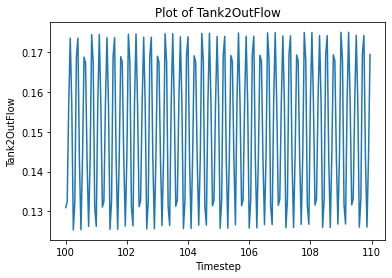

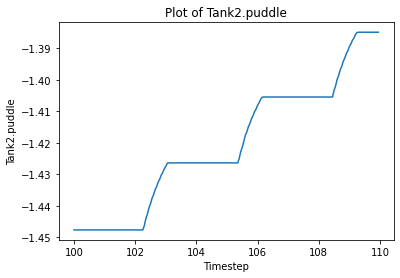

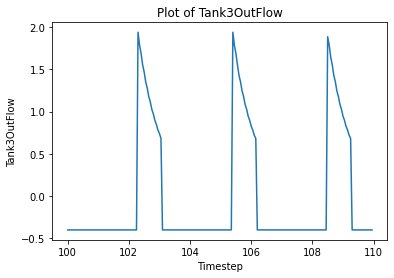

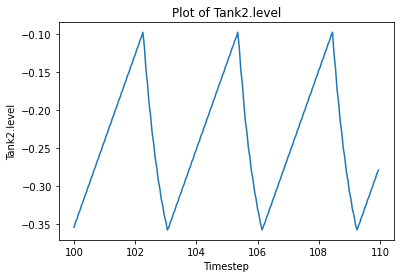

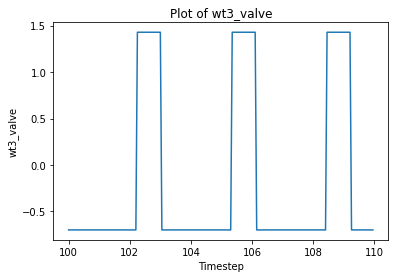

In [24]:
## SPecify the signal range of the golden data
begin = 2000
finish = 2200
input1 = testData.iloc[begin:finish,:]

## Visualise the input signals
plot_series(input1,attr)

# attr = list(pd.read_csv('test_series.csv').columns.values)[1:]
# for i in range(len(attr)):
#     title = "Input of {}".format(attr[i])
#     plt.title(title)
#     plt.xlabel("Timesteps")
#     plt.ylabel("Normalised values")
#     plt.plot(input1.iloc[:,i])
#     plt.show()

### Predict with the pretrained models (Golden data)
#### Golden model

In [25]:
steps = 15
predictions = golden_model.forecast(input1.values, steps=steps)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=input1.columns)

print(predictions_df)

    Tank2OutFlow  Tank2.puddle  Tank3OutFlow  Tank2.level  wt3_valve
0       0.166229     -1.385322     -0.981691    -0.170251  -0.441277
1       0.139371     -1.385694     -0.804998    -0.092865  -0.874201
2       0.121872     -1.386123     -1.080720     0.033779  -0.797971
3       0.140109     -1.386763     -0.936452     0.146382  -0.783591
4       0.169453     -1.387389     -0.872025     0.255468  -0.660896
5       0.158477     -1.388258     -0.659460     0.341610  -0.620512
6       0.120208     -1.389120     -0.565005     0.416505  -0.452769
7       0.116137     -1.390107     -0.311057     0.467195  -0.383060
8       0.145546     -1.391086     -0.203867     0.498241  -0.216256
9       0.159790     -1.392042      0.039067     0.524970  -0.462202
10      0.140114     -1.393051     -0.313607     0.564108  -0.510349
11      0.115430     -1.394180     -0.355874     0.629966  -0.513162
12      0.117487     -1.394977     -0.339840     0.678465  -0.579512
13      0.141236     -1.395692    

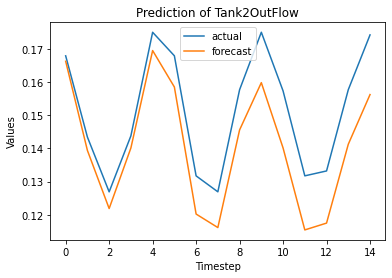

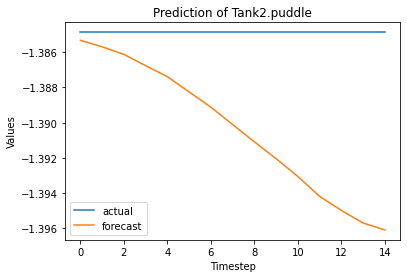

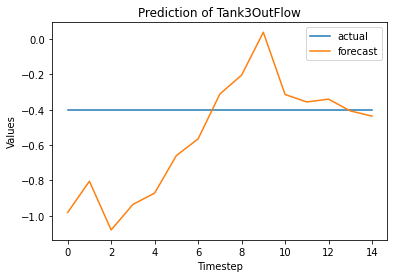

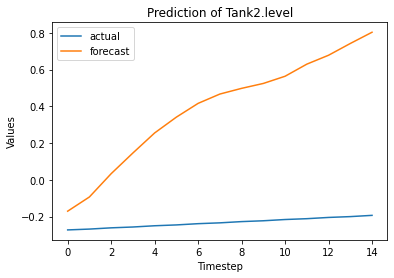

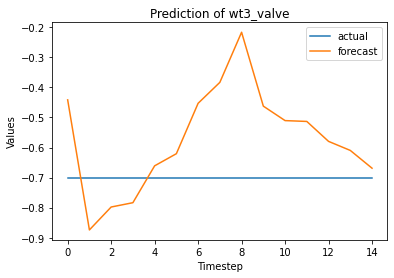

In [26]:
# plot_series(predictions_df, attr)
expected = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected, predictions_df, attr)
# plot_multiple_series(actual, pred, attr)

In [27]:
expected = expected.reset_index(drop=True)
RMSE_golden = []
for feat in attr:
    RMSE_golden.append(root_mse(predictions_df[feat], expected[feat]))
print(RMSE_golden)

[0.012114486610909534, 0.006626271854935035, 0.3489223646683037, 0.6767479842540826, 0.2109692138410525]


#### ValueFlip

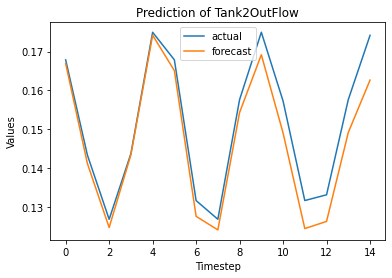

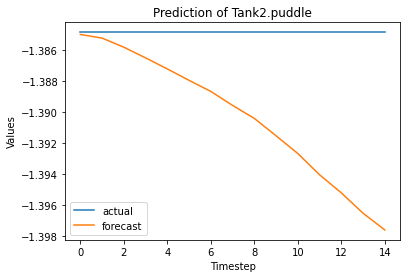

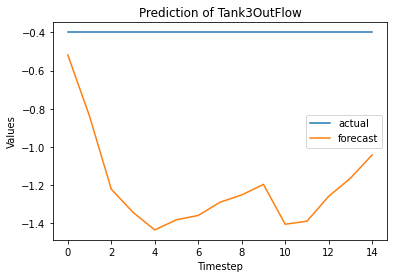

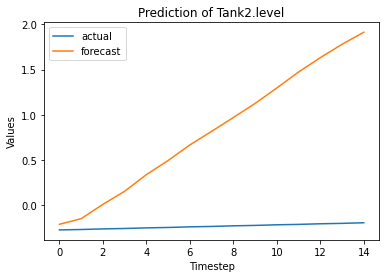

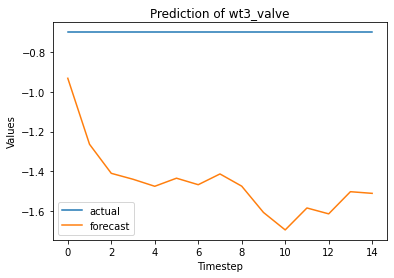

In [28]:
steps = 15
pred_valueFlip = valueFlip_model.forecast(input1.values, steps=steps)

# Convert predictions to a DataFrame
pred_valueFlip_df = pd.DataFrame(pred_valueFlip, columns=input1.columns)

# plot_series(predictions_df, attr)
expected_valueFlip = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected_valueFlip, pred_valueFlip_df, attr)
# plot_multiple_series(actual, pred, attr)

In [29]:
expected_valueFlip = expected_valueFlip.reset_index(drop=True)
RMSE_vf = []
for feat in attr:
    RMSE_vf.append(root_mse(pred_valueFlip_df[feat], expected_valueFlip[feat]))
print(RMSE_vf)

[0.005517063708583547, 0.006751388299625716, 0.8405323572154951, 1.2433226706807265, 0.7744986923149207]


### Stuck at zero

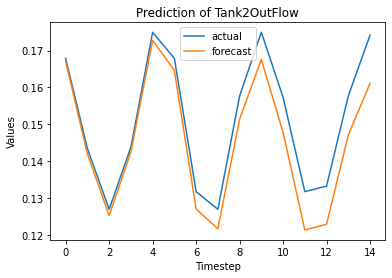

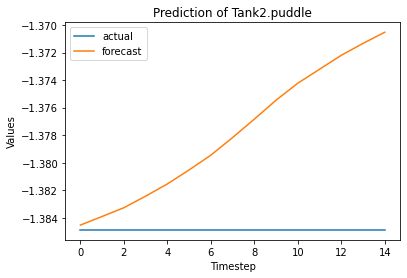

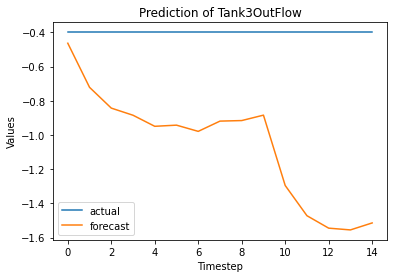

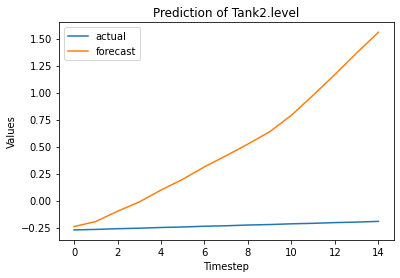

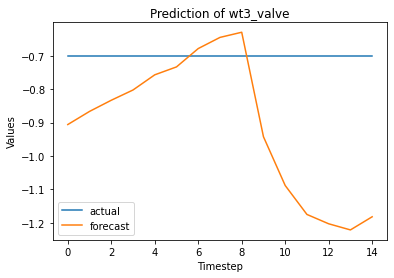

In [30]:
steps = 15
pred_stuckat0 = stuckat0_model.forecast(input1.values, steps=steps)

# Convert predictions to a DataFrame
pred_stuckat0_df = pd.DataFrame(pred_stuckat0, columns=input1.columns)

# plot_series(predictions_df, attr)
expected_stuckat0 = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected_stuckat0, pred_stuckat0_df, attr)
# plot_multiple_series(actual, pred, attr)

In [31]:
expected_stuckat0 = expected_stuckat0.reset_index(drop=True)
RMSE_s0 = []
for feat in attr:
    RMSE_s0.append(root_mse(pred_stuckat0_df[feat], expected_stuckat0[feat]))

# tested = root_mse(df['Tank1WaterLevel'].iloc[:steps], df_forecast['Tank1WaterLevel'])
# tested
print(RMSE_s0)

[0.007102182269043727, 0.008426043640523146, 0.734199579539484, 0.9042479663906864, 0.29496410176651794]


### stuckat one

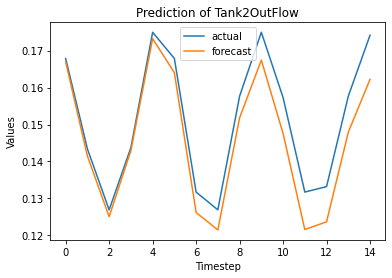

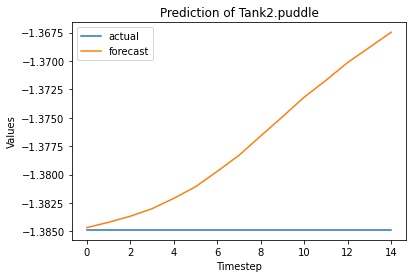

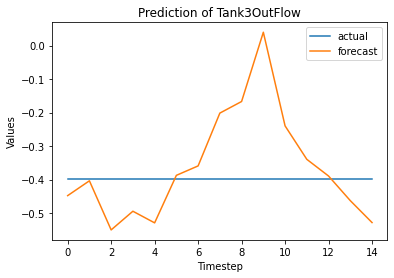

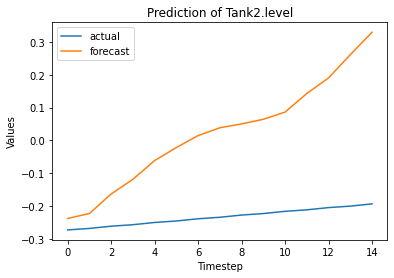

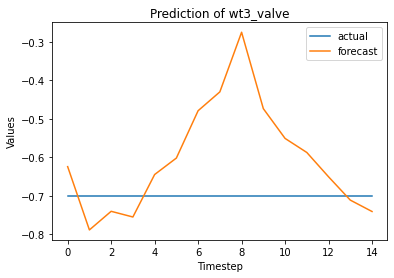

In [32]:
steps = 15
pred_stuckat1 = stuckat1_model.forecast(input1.values, steps=steps)

# Convert predictions to a DataFrame
pred_stuckat1_df = pd.DataFrame(pred_stuckat1, columns=input1.columns)
pred_stuckat1_df.index.name = "time"

# plot_series(predictions_df, attr)
expected_stuckat1 = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected_stuckat1, pred_stuckat1_df, attr)
# plot_multiple_series(actual, pred, attr)

In [33]:
# pred_stuckat1_df["Tank1WaterLevel"]
pred_stuckat1_df

,Tank2OutFlow,Tank2.puddle,Tank3OutFlow,Tank2.level,wt3_valve
time,,,,,
0,0.166955,-1.384665,-0.447876,-0.237417,-0.624069
1,0.141474,-1.384194,-0.403633,-0.222280,-0.788448
2,0.125065,-1.383663,-0.550203,-0.162960,-0.740110
3,0.142936,-1.383001,-0.494454,-0.118225,-0.754867
4,0.173239,-1.382088,-0.529166,-0.061186,-0.644546
5,0.164023,-1.381067,-0.387354,-0.021499,-0.601746
6,0.126186,-1.379712,-0.359196,0.014899,-0.478770
7,0.121473,-1.378300,-0.201606,0.038559,-0.429817
8,0.151802,-1.376596,-0.166974,0.050395,-0.274867


In [34]:
expected_stuckat1 = expected_stuckat1.reset_index(drop=True)
RMSE_s1 = []
for feat in attr:
    RMSE_s1.append(root_mse(pred_stuckat1_df[feat], expected_stuckat1[feat]))

print(RMSE_s1)

[0.006846122248261372, 0.009497363321898862, 0.16098232318874026, 0.29123533230704285, 0.1680542097506921]


### Predict with the pretrained models (Stuckat0 faults data)
#### Golden model

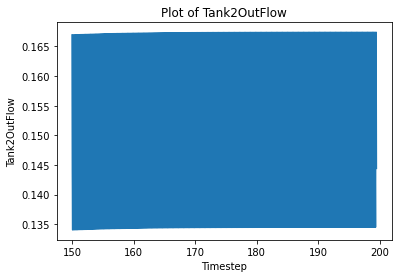

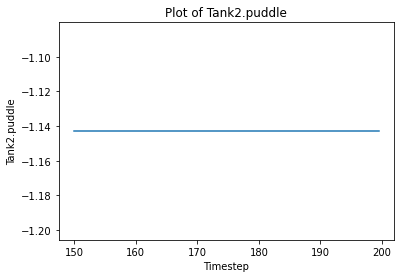

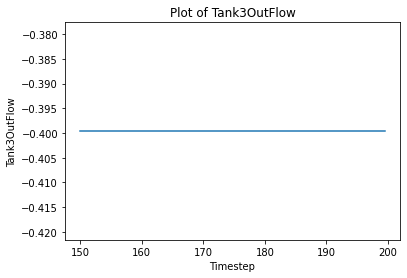

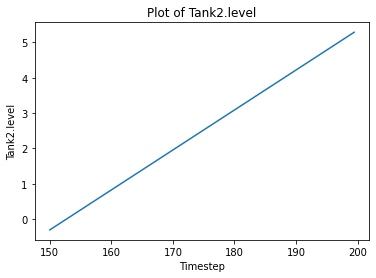

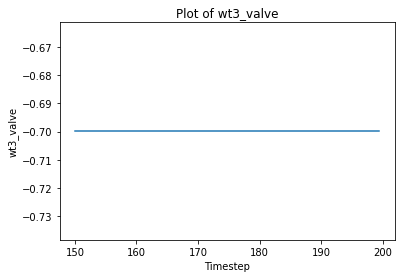

In [35]:
## SPecify the signal range
begin2 = 3000
finish2 = 3990
input2 = testData.iloc[begin2:finish2,:]

## Visualise the input signals
plot_series(input2,attr)

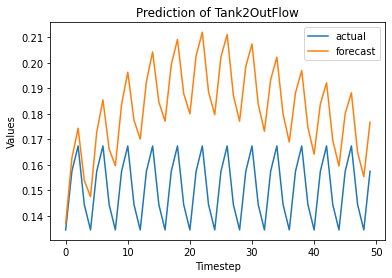

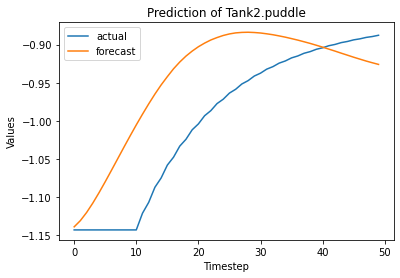

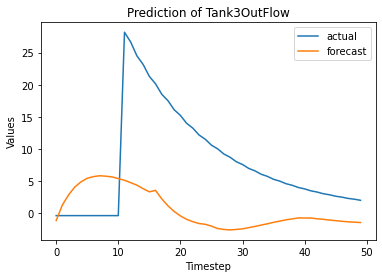

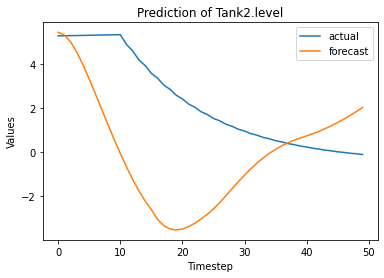

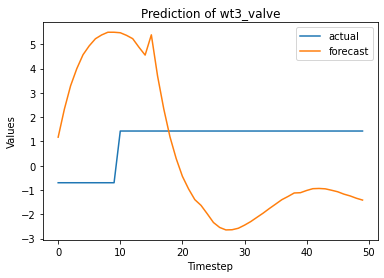

In [36]:
steps = 50
predictions2 = golden_model.forecast(input2.values, steps=steps)

# Convert predictions to a DataFrame
predictions2_df = pd.DataFrame(predictions2, columns=input2.columns)

# plot_series(predictions_df, attr)
expected2 = testData.iloc[finish2:finish2+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected2, predictions2_df, attr)
# plot_multiple_series(actual, pred, attr)

In [37]:
expected2 = expected2.reset_index(drop=True)
RMSE2_golden = []
for feat in attr:
    RMSE2_golden.append(root_mse(predictions2_df[feat], expected2[feat]))
print(RMSE2_golden)

[0.03303793387503503, 0.07416656537589672, 10.853652435817745, 3.618403574396235, 3.556451055770057]


#### ValueFlip

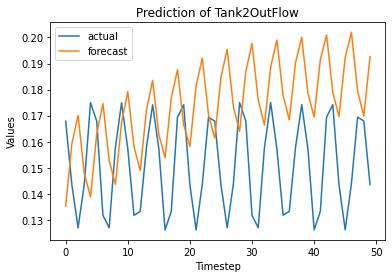

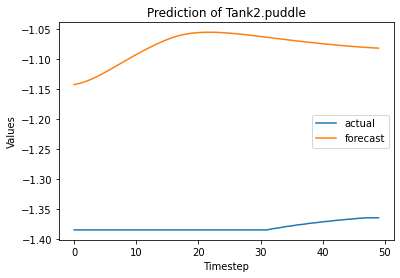

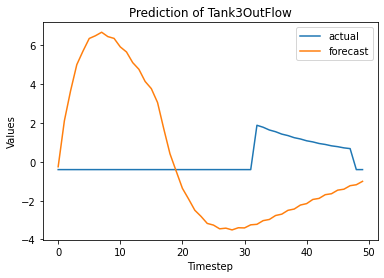

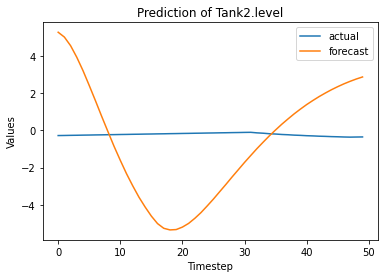

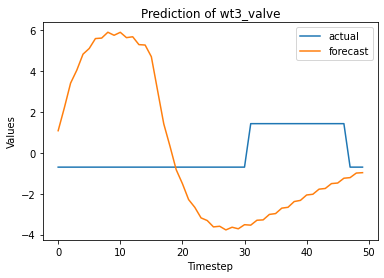

In [38]:
steps = 50
pred2_valueFlip = valueFlip_model.forecast(input2.values, steps=steps)

# Convert predictions to a DataFrame
pred2_valueFlip_df = pd.DataFrame(pred2_valueFlip, columns=input2.columns)

# plot_series(predictions_df, attr)
expected2_valueFlip = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected2_valueFlip, pred2_valueFlip_df, attr)
# plot_multiple_series(actual, pred, attr)

In [39]:
expected2_valueFlip = expected2_valueFlip.reset_index(drop=True)
RMSE2_vf = []
for feat in attr:
    RMSE2_vf.append(root_mse(pred2_valueFlip_df[feat], expected2_valueFlip[feat]))
print(RMSE2_vf)

[0.03378515168886061, 0.3018364670172912, 3.9957048780566464, 3.1884901306094258, 4.09300094887001]


### Stuck at zero

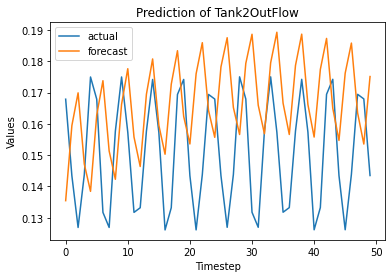

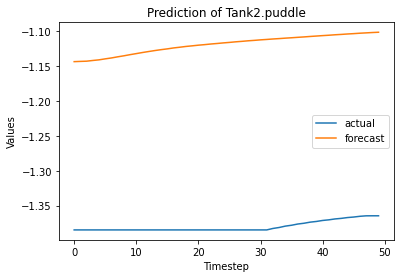

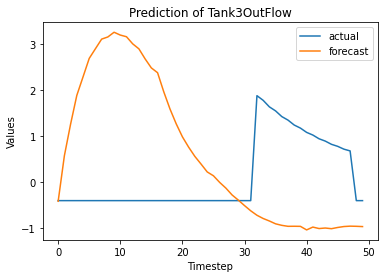

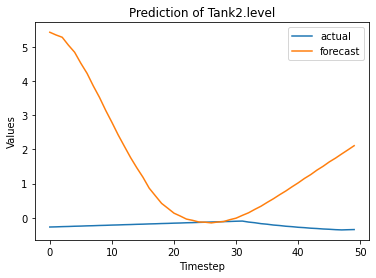

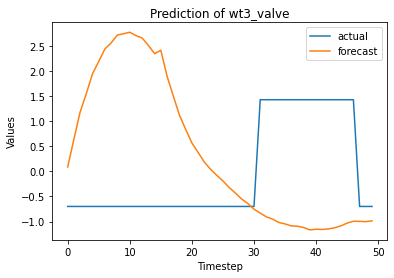

In [40]:
steps = 50
pred2_stuckat0 = stuckat0_model.forecast(input2.values, steps=steps)

# Convert predictions to a DataFrame
pred2_stuckat0_df = pd.DataFrame(pred2_stuckat0, columns=input2.columns)

# plot_series(predictions_df, attr)
expected2_stuckat0 = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected2_stuckat0, pred2_stuckat0_df, attr)
# plot_multiple_series(actual, pred, attr)

In [41]:
expected2_stuckat0 = expected2_stuckat0.reset_index(drop=True)
RMSE2_s0 = []
for feat in attr:
    RMSE2_s0.append(root_mse(pred2_stuckat0_df[feat], expected2_stuckat0[feat]))

print(RMSE2_s0)

[0.027750830362077546, 0.26121167912503046, 2.1992458649032893, 2.4846774190554832, 2.2641719346339286]


### stuckat one

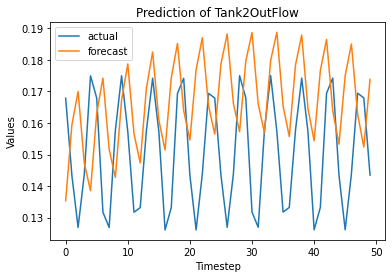

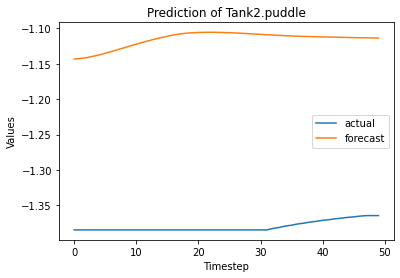

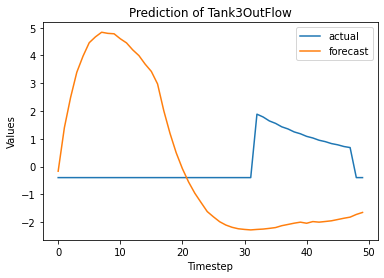

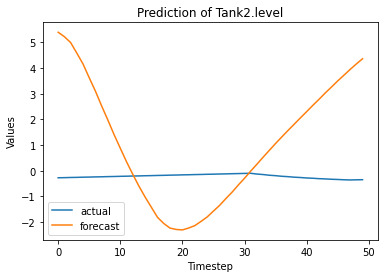

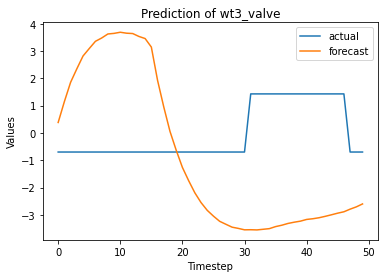

In [42]:
steps = 50
pred2_stuckat1 = stuckat1_model.forecast(input2.values, steps=steps)

# Convert predictions to a DataFrame
pred2_stuckat1_df = pd.DataFrame(pred2_stuckat1, columns=input2.columns)
pred2_stuckat1_df.index.name = "time"

# plot_series(predictions_df, attr)
expected2_stuckat1 = testData.iloc[finish:finish+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected2_stuckat1, pred2_stuckat1_df, attr)
# plot_multiple_series(actual, pred, attr)

In [43]:
expected2_stuckat1 = expected2_stuckat1.reset_index(drop=True)
RMSE2_s1 = []
for feat in attr:
    RMSE2_s1.append(root_mse(pred2_stuckat1_df[feat], expected2_stuckat1[feat]))

print(RMSE2_s1)

[0.027805343155496175, 0.2649232426509505, 3.2110995470400687, 2.742203353907007, 3.615266409841754]


### Predict with the pretrained models (Stuckat1 fault data)
#### Golden model

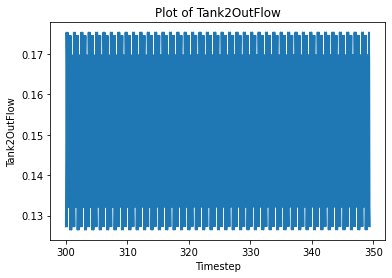

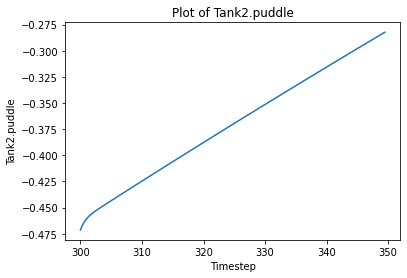

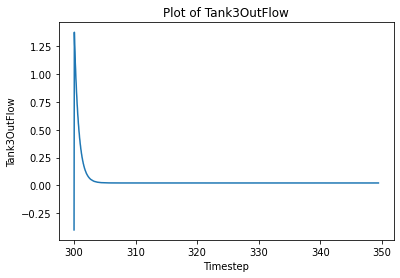

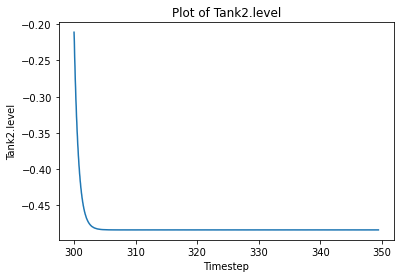

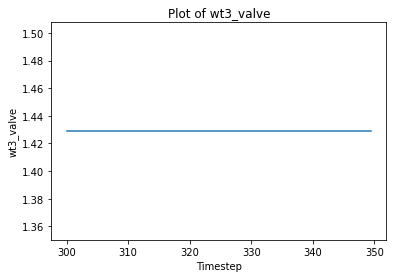

In [44]:
## SPecify the signal range
begin3 = 6000
finish3 = 6990
input3 = testData.iloc[begin3:finish3,:]

## Visualise the input signals
plot_series(input3,attr)

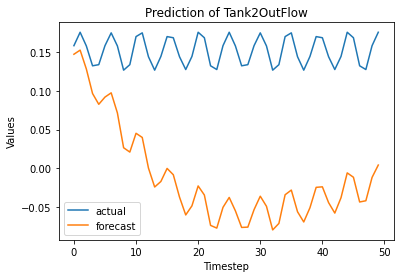

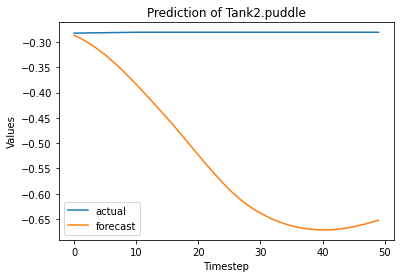

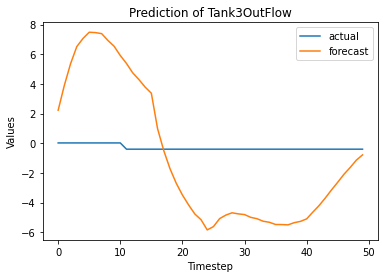

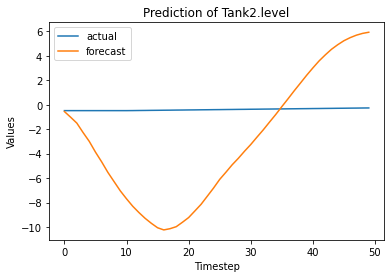

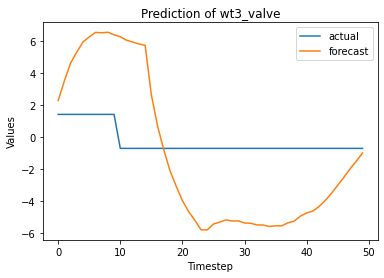

In [45]:
steps = 50
predictions3 = golden_model.forecast(input3.values, steps=steps)

# Convert predictions to a DataFrame
predictions3_df = pd.DataFrame(predictions3, columns=input3.columns)

# plot_series(predictions_df, attr)
expected3 = testData.iloc[finish3:finish3+steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected3, predictions3_df, attr)
# plot_multiple_series(actual, pred, attr)

In [46]:
expected3 = expected3.reset_index(drop=True)
RMSE3_golden = []
for feat in attr:
    RMSE3_golden.append(root_mse(predictions3_df[feat], expected3[feat]))
print(RMSE3_golden)

[0.17170783900719502, 0.2879592465247936, 4.634579352962772, 5.74907451944147, 4.297988619669339]


#### ValueFlip

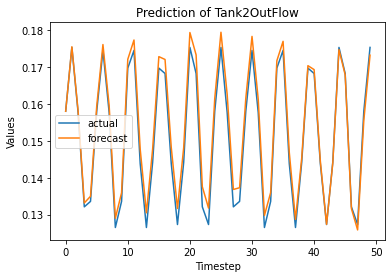

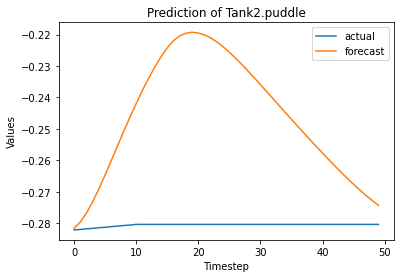

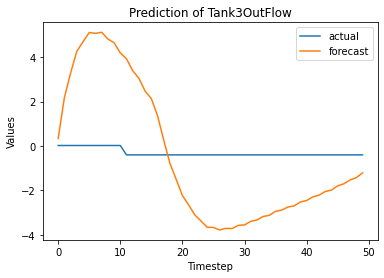

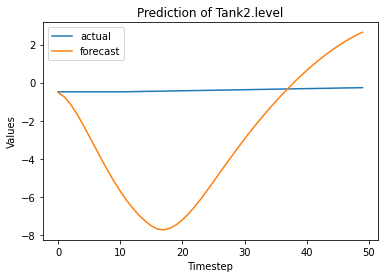

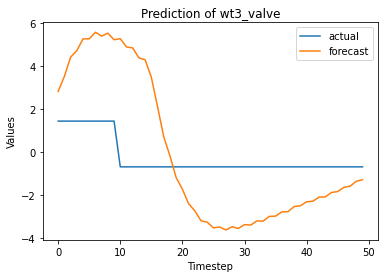

In [47]:
steps = 50
pred3_valueFlip = valueFlip_model.forecast(input3.values, steps=steps)

# Convert predictions to a DataFrame
pred3_valueFlip_df = pd.DataFrame(pred3_valueFlip, columns=input3.columns)

# plot_series(predictions_df, attr)
expected3_valueFlip = testData.iloc[finish3:finish3 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected3_valueFlip, pred3_valueFlip_df, attr)
# plot_multiple_series(actual, pred, attr)

In [48]:
expected3_valueFlip = expected3_valueFlip.reset_index(drop=True)
RMSE3_vf = []
for feat in attr:
    RMSE3_vf.append(root_mse(pred3_valueFlip_df[feat], expected3_valueFlip[feat]))
print(RMSE3_vf)

[0.0029562615889528717, 0.039269076130117306, 2.971776266099944, 4.09899308365647, 2.9114752603918155]


### Stuck at zero

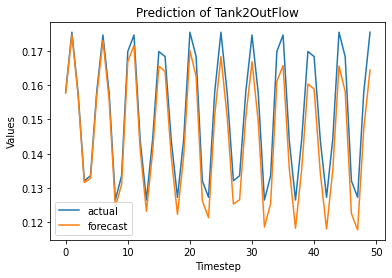

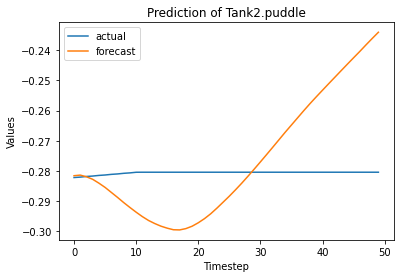

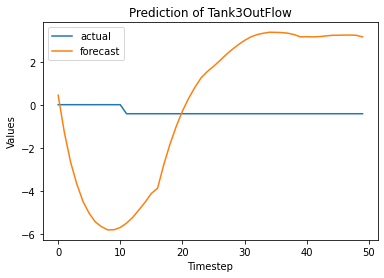

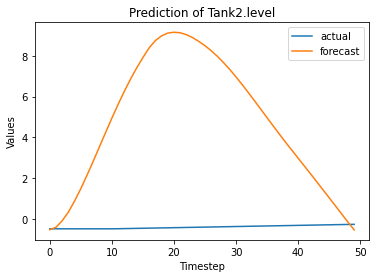

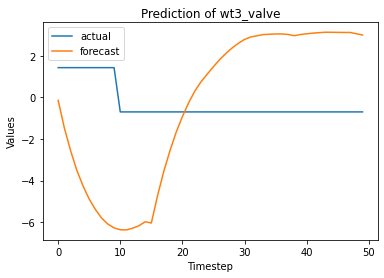

In [49]:
steps = 50
pred3_stuckat0 = stuckat0_model.forecast(input3.values, steps=steps)

# Convert predictions to a DataFrame
pred3_stuckat0_df = pd.DataFrame(pred3_stuckat0, columns=input3.columns)

# plot_series(predictions_df, attr)
expected3_stuckat0 = testData.iloc[finish3:finish3 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected3_stuckat0, pred3_stuckat0_df, attr)
# plot_multiple_series(actual, pred, attr)

In [50]:
expected3_stuckat0 = expected3_stuckat0.reset_index(drop=True)
RMSE3_s0 = []
for feat in attr:
    RMSE3_s0.append(root_mse(pred3_stuckat0_df[feat], expected3_stuckat0[feat]))

print(RMSE3_s0)

[0.006740683480123361, 0.020416988061969312, 3.651763937037137, 6.078255364278208, 4.182559654962761]


### stuckat one

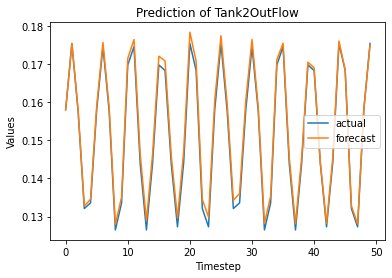

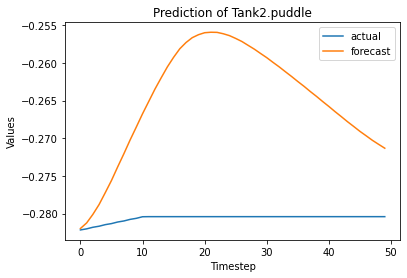

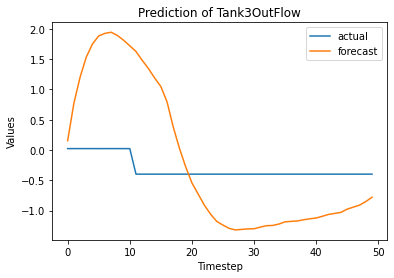

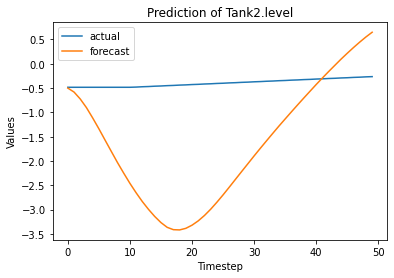

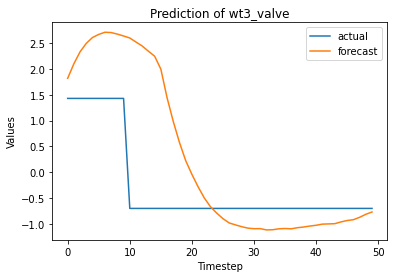

In [51]:
steps = 50
pred3_stuckat1 = stuckat1_model.forecast(input3.values, steps=steps)

# Convert predictions to a DataFrame
pred3_stuckat1_df = pd.DataFrame(pred3_stuckat1, columns=input3.columns)
pred3_stuckat1_df.index.name = "time"

# plot_series(predictions_df, attr)
expected3_stuckat1 = testData.iloc[finish3:finish3 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected3_stuckat1, pred3_stuckat1_df, attr)
# plot_multiple_series(actual, pred, attr)

In [52]:
expected3_stuckat1 = expected3_stuckat1.reset_index(drop=True)
RMSE3_s1 = []
for feat in attr:
    RMSE3_s1.append(root_mse(pred3_stuckat1_df[feat], expected3_stuckat1[feat]))

print(RMSE3_s1)

[0.0017114612115173707, 0.017219384901476457, 1.1019910926239322, 1.7254992199253427, 1.274451430018748]


### Predict with the pretrained models (ValueFlip fault data)
#### Golden model

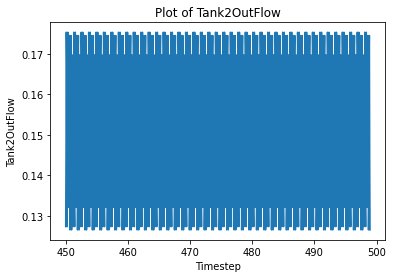

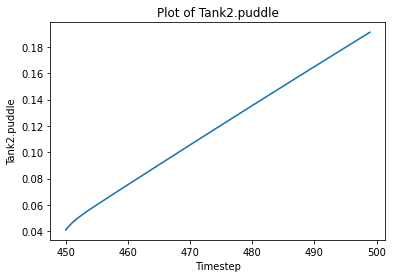

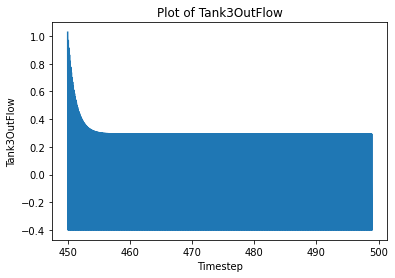

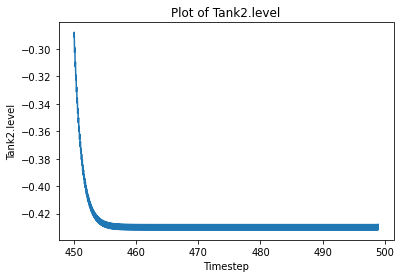

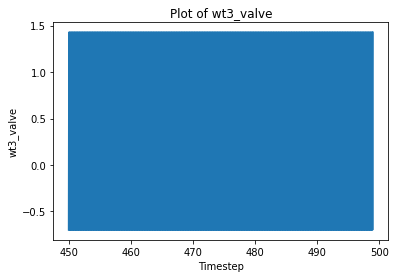

In [53]:
## SPecify the signal range
begin4 = 9000
finish4 = 9980
input4 = testData.iloc[begin4:finish4,:]

## Visualise the input signals
plot_series(input4,attr)

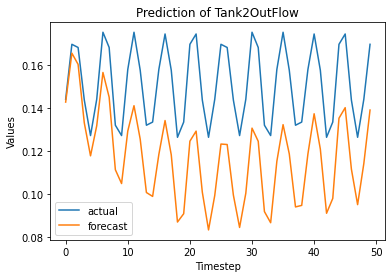

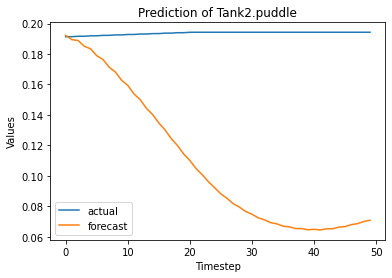

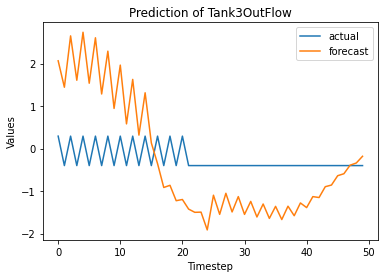

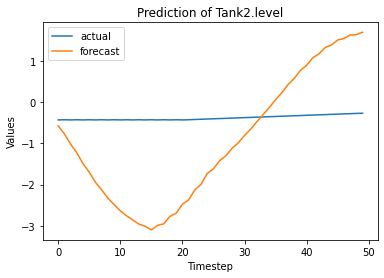

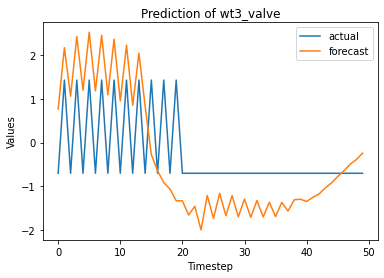

In [54]:
steps = 50
predictions4 = golden_model.forecast(input4.values, steps=steps)

# Convert predictions to a DataFrame
predictions4_df = pd.DataFrame(predictions4, columns=input4.columns)

# plot_series(predictions_df, attr)
expected4 = testData.iloc[finish4:finish4 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected4, predictions4_df, attr)
# plot_multiple_series(actual, pred, attr)

In [55]:
expected4 = expected4.reset_index(drop=True)
RMSE4_golden = []
for feat in attr:
    RMSE4_golden.append(root_mse(predictions4_df[feat], expected4[feat]))
print(RMSE4_golden)

[0.03562157973876745, 0.09619015523527455, 1.232031487892965, 1.6018321672131004, 1.09195125488575]


#### ValueFlip

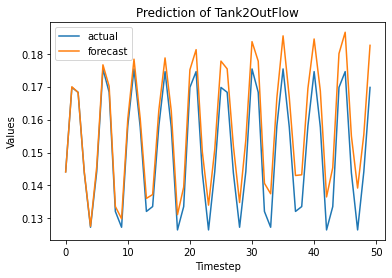

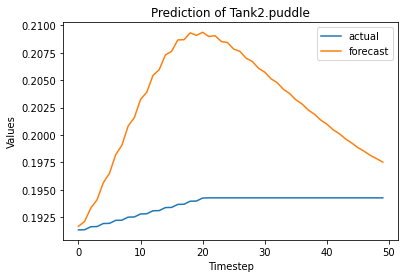

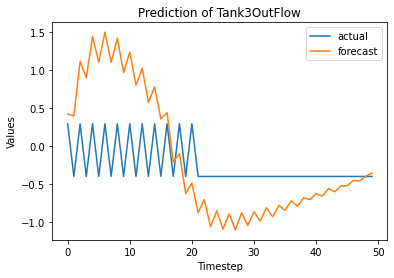

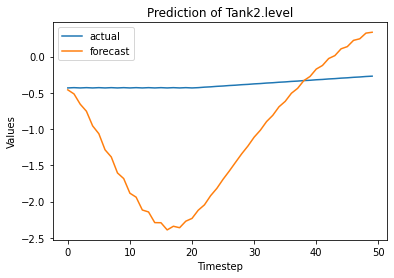

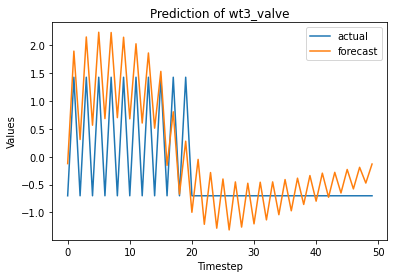

In [56]:
steps = 50
pred4_valueFlip = valueFlip_model.forecast(input4.values, steps=steps)

# Convert predictions to a DataFrame
pred4_valueFlip_df = pd.DataFrame(pred4_valueFlip, columns=input4.columns)

# plot_series(predictions_df, attr)
expected4_valueFlip = testData.iloc[finish4:finish4 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected4_valueFlip, pred4_valueFlip_df, attr)
# plot_multiple_series(actual, pred, attr)

In [57]:
expected4_valueFlip = expected4_valueFlip.reset_index(drop=True)
RMSE4_vf = []
for feat in attr:
    RMSE4_vf.append(root_mse(pred4_valueFlip_df[feat], expected4_valueFlip[feat]))
print(RMSE4_vf)

[0.007674374852089207, 0.010150725174305434, 0.6886571523917207, 1.089870709316984, 0.6567151354447065]


### Stuck at zero

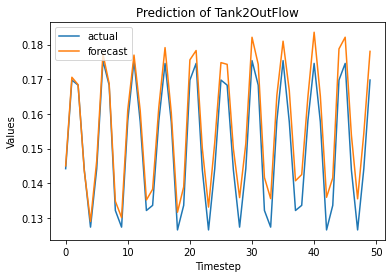

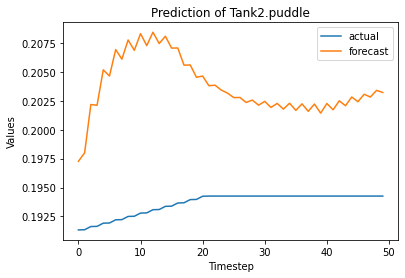

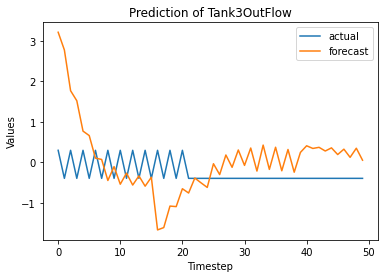

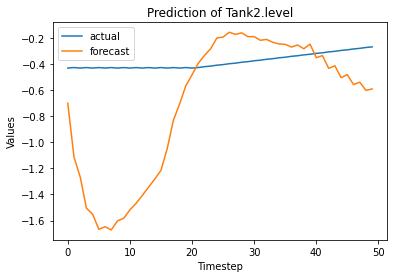

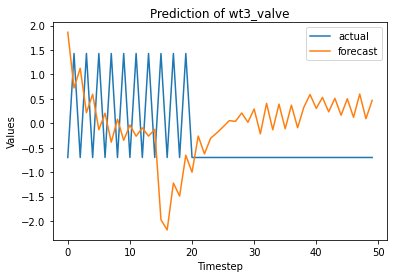

In [58]:
steps = 50
pred4_stuckat0 = stuckat0_model.forecast(input4.values, steps=steps)

# Convert predictions to a DataFrame
pred4_stuckat0_df = pd.DataFrame(pred4_stuckat0, columns=input4.columns)

# plot_series(predictions_df, attr)
expected4_stuckat0 = testData.iloc[finish4:finish4 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected4_stuckat0, pred4_stuckat0_df, attr)
# plot_multiple_series(actual, pred, attr)

In [59]:
expected4_stuckat0 = expected4_stuckat0.reset_index(drop=True)
RMSE4_s0 = []
for feat in attr:
    RMSE4_s0.append(root_mse(pred4_stuckat0_df[feat], expected4_stuckat0[feat]))

print(RMSE4_s0)

[0.0062834522783900785, 0.010427525853140104, 0.9632483583733046, 0.597922890589487, 1.2651726395035034]


### stuckat one

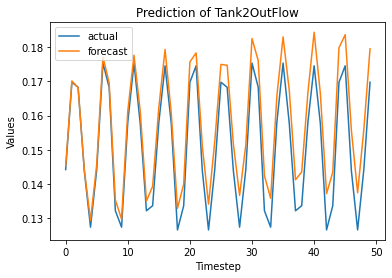

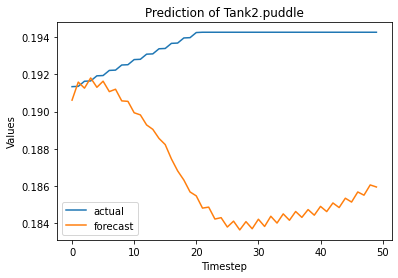

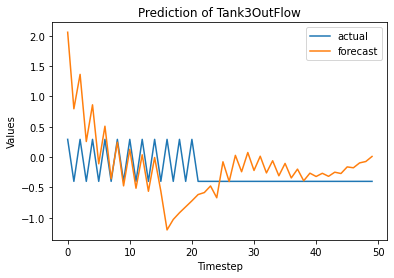

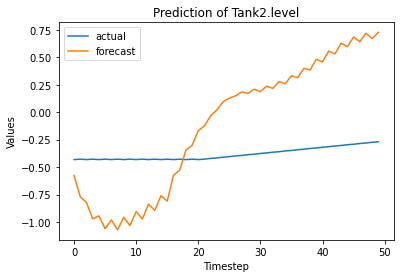

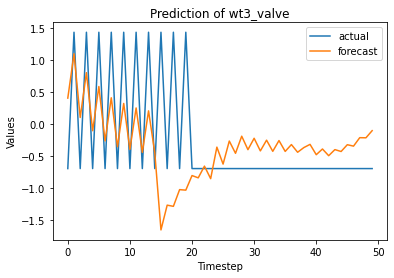

In [60]:
steps = 50
pred4_stuckat1 = stuckat1_model.forecast(input4.values, steps=steps)

# Convert predictions to a DataFrame
pred4_stuckat1_df = pd.DataFrame(pred4_stuckat1, columns=input4.columns)
pred4_stuckat1_df.index.name = "time"

# plot_series(predictions_df, attr)
expected4_stuckat1 = testData.iloc[finish4:finish4 + steps,:]
# plot_multiple_series(test.iloc[:15,:], predictions_df, attr)
plot_multiple_series(expected4_stuckat1, pred4_stuckat1_df, attr)
# plot_multiple_series(actual, pred, attr)

In [61]:
expected4_stuckat1 = expected4_stuckat1.reset_index(drop=True)
RMSE4_s1 = []
for feat in attr:
    RMSE4_s1.append(root_mse(pred4_stuckat1_df[feat], expected4_stuckat1[feat]))

print(RMSE4_s1)

[0.007119833160268628, 0.007888976585659702, 0.5268132962889731, 0.6161969563881058, 0.8488817660375475]


### End of the Notebook